In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Dt_Report,Status,Dt_Assigned,Dt_Solved,Dt_Closed,Reopn,Severity,Developer,Module,Cause,Project ID
0,2020-07-12,2,2020-07-19,2020-07-24,NaN,1,1,2,0,0,0
1,2020-06-29,1,2020-07-07,NaN,NaN,0,3,0,1,0,0
2,2020-07-24,2,2020-07-29,2020-08-05,NaN,0,7,1,0,0,1
3,2020-07-16,1,2020-07-21,NaN,NaN,1,3,1,0,1,0
4,2020-07-28,2,2020-08-04,2020-08-15,NaN,1,1,3,1,1,1


In [5]:
df.rename(columns={"Project ID": "project"}, inplace=True)

In [6]:
df.project = df.project.astype("object")

In [7]:
df.project = df.project.map({0: "Project 0", 1: "Project 1"})

# Project 0 VS Project 1

#### 1.1 Bug number and severity  

In [9]:
df["project"].value_counts()

Project 1    53
Project 0    47
Name: project, dtype: int64

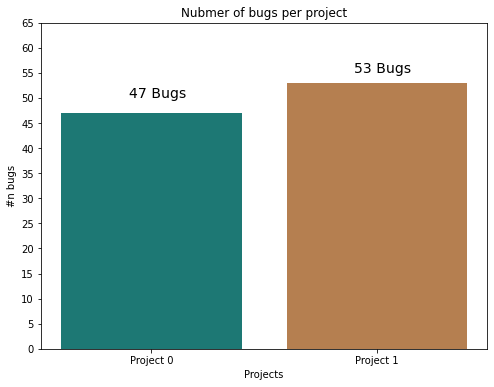

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(df.project.value_counts().index[::-1], df.project.value_counts().values[::-1], color = ["#1D7874", '#B57F50']);

plt.annotate(f"{df.project.value_counts().values[1]} Bugs", (-0.1, 50), fontsize=14)
plt.annotate(f"{df.project.value_counts().values[0]} Bugs", (0.9, 55), fontsize=14)


plt.title("Nubmer of bugs per project");
plt.xlabel("Projects");
plt.ylabel("#n bugs");
plt.yticks(np.arange(0, 70, 5));

In [70]:
df.columns

Index(['Dt_Report', 'Status', 'Dt_Assigned', 'Dt_Solved', 'Dt_Closed', 'Reopn',
       'Severity', 'Developer', 'Module', 'Cause', 'project', 'w_severity'],
      dtype='object')

#### Comparing high severity bugs between projectss

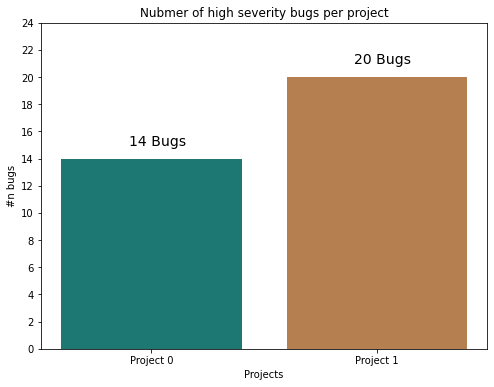

In [79]:
only_high = df.query("w_severity == 'High'").copy()
plt.figure(figsize=(8, 6))
plt.bar(only_high.project.value_counts().index[::-1], only_high.project.value_counts().values[::-1], color = ["#1D7874", '#B57F50']);

plt.annotate(f"{only_high.project.value_counts().values[1]} Bugs", (-0.1, 15), fontsize=14)
plt.annotate(f"{only_high.project.value_counts().values[0]} Bugs", (0.9, 21), fontsize=14)


plt.title("Nubmer of high severity bugs per project");
plt.xlabel("Projects");
plt.ylabel("#n bugs");
plt.yticks(np.arange(0, 25, 2));


#### 1.2 Weighted Bug Number

In [112]:
df.groupby("project")["Severity"].sum()

project
Project 0    171
Project 1    203
Name: Severity, dtype: int64

#### project 0  and 1 bug severity

In [11]:
project0_severity = df.query("project == 'Project 0'").Severity.value_counts().sort_index()
project1_severity = df.query("project == 'Project 1'").Severity.value_counts().sort_index()

In [12]:
df.Severity

0     1
1     3
2     7
3     3
4     1
     ..
95    7
96    3
97    7
98    1
99    3
Name: Severity, Length: 100, dtype: int64

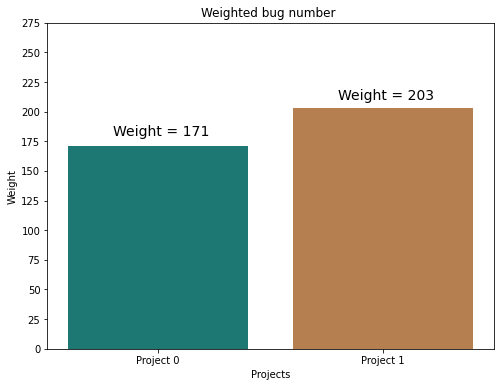

In [13]:
p_severity = df.groupby("project")["Severity"].sum()
plt.figure(figsize=(8, 6))
plt.bar(p_severity.index, p_severity.values, color = ["#1D7874", '#B57F50']);

plt.annotate(f"Weight = {p_severity.values[0]}", (-0.2, 180), fontsize=14)
plt.annotate(f"Weight = {p_severity.values[1]}", (0.8, 210), fontsize=14)


plt.title("Weighted bug number ");
plt.xlabel("Projects");
plt.ylabel("Weight");
plt.yticks(np.arange(0, 300, 25));


### We will assume that KLOC (Software System Size) = 36

In [14]:
kloc = 36

#### 1.3 Bug Density and wighted bug density

In [17]:
project_groups = df.groupby("project")

In [19]:
bugs_density = project_groups["Status"].count() / kloc
bugs_density

project
Project 0    1.305556
Project 1    1.472222
Name: Status, dtype: float64

In [41]:
weighted_bug_density = project_groups["Severity"].sum() / kloc
weighted_bug_density

project
Project 0    4.750000
Project 1    5.638889
Name: Severity, dtype: float64

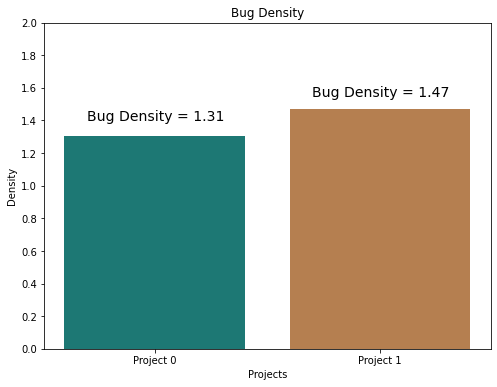

In [68]:
plt.figure(figsize=(8, 6))
plt.bar(bugs_density.index, bugs_density.values, color = ["#1D7874", '#B57F50']);

plt.annotate(f"Bug Density = {round(bugs_density.values[0], 2)}", (-0.3, 1.4), fontsize=14)
plt.annotate(f"Bug Density = {round(bugs_density.values[1], 2)}", (0.7, 1.55), fontsize=14)


plt.title("Bug Density");
plt.xlabel("Projects");
plt.ylabel("Density");
plt.yticks(np.arange(0, 2.2, 0.2));

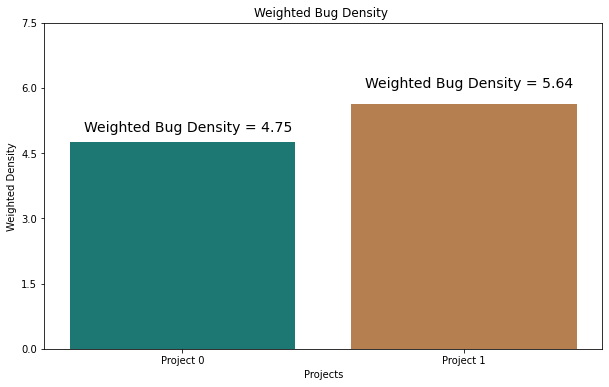

In [69]:
plt.figure(figsize=(10, 6))
plt.bar(weighted_bug_density.index, weighted_bug_density.values, color = ["#1D7874", '#B57F50']);

plt.annotate(f"Weighted Bug Density = {round(weighted_bug_density.values[0], 2)}", (-0.35, 5), fontsize=14)


plt.annotate(f"Weighted Bug Density = {round(weighted_bug_density.values[1], 2)}", (0.65, 6), fontsize=14)



plt.title("Weighted Bug Density ");
plt.xlabel("Projects");
plt.ylabel("Weighted Density");
plt.yticks(np.arange(0, 9, 1.5));

#### 1.4 Average Bug Severity

In [22]:
df["w_severity"] = df["Severity"].map({1: "Low", 3: "Medium", 7: "High"})

In [23]:
df.query("project == 'Project 1'").w_severity.value_counts()

High      20
Low       18
Medium    15
Name: w_severity, dtype: int64

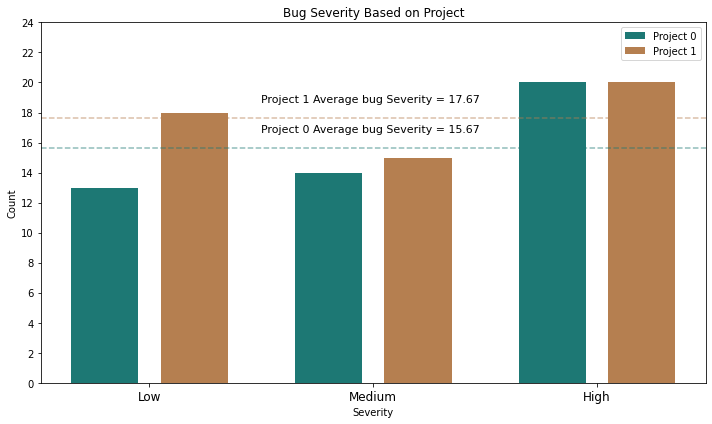

In [24]:
labels = np.array(range(1,4))
project0_severity_vals = [13, 14, 20]
project1_severity_vals = [18, 15, 20]

p0_avg_severity = np.average(project0_severity.values)
p1_avg_severity = np.average(project1_severity.values)

width = 0.3  # the width of the bars

fig, ax = plt.subplots()


fig.set_size_inches(10, 6);

ax.bar(labels - 0.05 - width/2, project0_severity_vals, width, label='Project 0', color = "#1D7874")
ax.bar(labels + 0.05 + width/2, project1_severity_vals, width, label='Project 1', color = '#B57F50')

plt.annotate(f"Project 0 Average bug Severity = {round(p0_avg_severity, 2)}", (1.5, p0_avg_severity+1), fontsize=11)
plt.axhline(y=p0_avg_severity, alpha = 0.5, linestyle = "--", color = "#1D7874")

plt.annotate(f"Project 1 Average bug Severity = {round(p1_avg_severity, 2)}", (1.5, p1_avg_severity+1), fontsize=11)
plt.axhline(y=p1_avg_severity, alpha = 0.5, linestyle = "--", color = '#B57F50')


plt.yticks(np.arange(0, 25, 2));


plt.xticks(range(1, 4), ["Low", "Medium", "High"], size='large')

ax.set_ylabel('Count')
ax.set_xlabel('Severity')

ax.set_title('Bug Severity Based on Project')
ax.legend()

fig.tight_layout()

plt.show()

# 2 Comparing Developers Performance